# 网址

In [20]:
url = 'https://book.douban.com/top250'

# 函数：请求+获取网页数据	

In [2]:
import requests

# 函数：获得html  get_html(url)
# 参数说明：url为单个网址
# 返回值：html为网址的html数据，即网页源代码的字符串
def get_html(url):         # 添加：定义函数名
    headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) \
            AppleWebKit/537.36 (KHTML, like Gecko) \
           Chrome/119.0.0.0 Safari/537.36 Edg/119.0.0.0'}
    resp = requests.get(url,headers=headers)
    html = resp.text
    return html            # 添加：返回网址的html数据

In [21]:
html = get_html(url)

In [22]:
#查看源代码
print(html)



<!DOCTYPE html>
<html lang="zh-cmn-Hans" class="ua-windows ua-webkit book-new-nav">
<head>
  <meta http-equiv="Content-Type" content="text/html; charset=utf-8">
  <title>豆瓣读书 Top 250</title>
  
<script>!function(e){var o=function(o,n,t){var c,i,r=new Date;n=n||30,t=t||"/",r.setTime(r.getTime()+24*n*60*60*1e3),c="; expires="+r.toGMTString();for(i in o)e.cookie=i+"="+o[i]+c+"; path="+t},n=function(o){var n,t,c,i=o+"=",r=e.cookie.split(";");for(t=0,c=r.length;t<c;t++)if(n=r[t].replace(/^\s+|\s+$/g,""),0==n.indexOf(i))return n.substring(i.length,n.length).replace(/\"/g,"");return null},t=e.write,c={"douban.com":1,"douban.fm":1,"google.com":1,"google.cn":1,"googleapis.com":1,"gmaptiles.co.kr":1,"gstatic.com":1,"gstatic.cn":1,"google-analytics.com":1,"googleadservices.com":1},i=function(e,o){var n=new Image;n.onload=function(){},n.src="https://www.douban.com/j/except_report?kind=ra022&reason="+encodeURIComponent(e)+"&environment="+encodeURIComponent(o)},r=function(o){try{t.call(e,o)}catch(

# 解析数据

In [6]:
from pyquery import PyQuery as pq  #导入pyquery包
import re    # 导入re包

In [8]:
doc = pq(html)    # 创建PyQuery对象

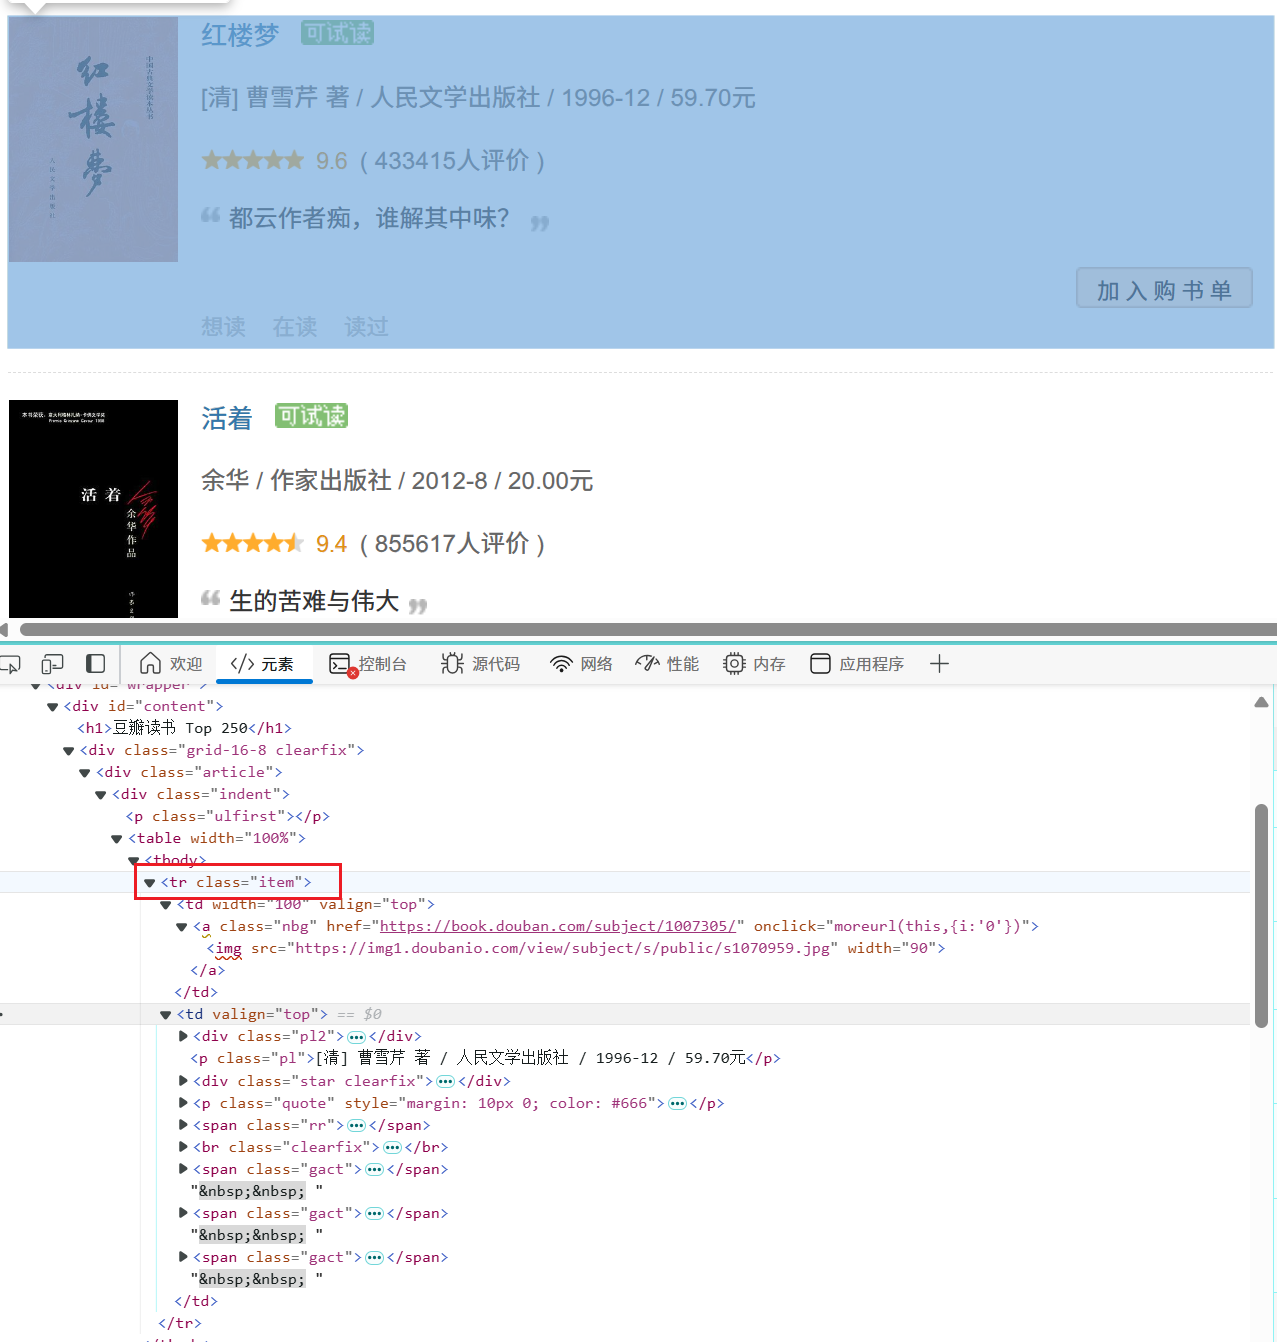

每本书的评分、作者、出版社、出版日期评价人数等信息都在`tr.item`中，使用`items()`函数来获取每一本书的详细信息。

In [9]:
for book in doc.items('tr.item'):
    print(book)

<tr class="item">
          <td width="100" valign="top">
            <a class="nbg" href="https://book.douban.com/subject/1007305/" onclick="moreurl(this,{i:'0'})">
              <img src="https://img1.doubanio.com/view/subject/s/public/s1070959.jpg" width="90"/>
            </a>
          </td>
          <td valign="top">
            
            <div class="pl2">


              <a href="https://book.douban.com/subject/1007305/" onclick="&quot;moreurl(this,{i:'0'})&quot;" title="红楼梦">
                红楼梦

                
              </a>



                  <img src="https://img1.doubanio.com/f/shire/1870cf871daf88c4cf42aba988dc7b0372748ed7/pics/read.gif" alt="可试读" title="可试读"/>

              
            </div>

              <p class="pl">[清] 曹雪芹 著 / 人民文学出版社 / 1996-12 / 59.70元</p>

            

              
              <div class="star clearfix">
                  <span class="allstar50"/>
                  <span class="rating_nums">9.6</span>

                <span clas

其中，提取第一本的基本信息

In [12]:
# 获取所有匹配的元素并转换为列表
books = list(doc.items('tr.item'))

# 获取第一个元素
first_book = books[0]

# 打印出第一个元素（此时是 PyQuery 对象）
print(first_book)

<tr class="item">
          <td width="100" valign="top">
            <a class="nbg" href="https://book.douban.com/subject/1007305/" onclick="moreurl(this,{i:'0'})">
              <img src="https://img1.doubanio.com/view/subject/s/public/s1070959.jpg" width="90"/>
            </a>
          </td>
          <td valign="top">
            
            <div class="pl2">


              <a href="https://book.douban.com/subject/1007305/" onclick="&quot;moreurl(this,{i:'0'})&quot;" title="红楼梦">
                红楼梦

                
              </a>



                  <img src="https://img1.doubanio.com/f/shire/1870cf871daf88c4cf42aba988dc7b0372748ed7/pics/read.gif" alt="可试读" title="可试读"/>

              
            </div>

              <p class="pl">[清] 曹雪芹 著 / 人民文学出版社 / 1996-12 / 59.70元</p>

            

              
              <div class="star clearfix">
                  <span class="allstar50"/>
                  <span class="rating_nums">9.6</span>

                <span clas

将第一本书的内容保存成字典（**案例4的内容**）

In [14]:
book_name = book('.pl2 a').text()    
desc = book('span.inq').text()
score = book('.rating_nums').text()
            
info_list = book('p.pl').text().split('/')    
publisher = info_list[-3].strip()   
pub_time = info_list[-2]
price = info_list[-1]
authors = ''.join(info_list[:-3])
            
people_num_raw = book('span.pl').text()       
people_num = re.findall('[0-9]+', people_num_raw)[0]

bookinfo = {'book_name':book_name,
             'authors':authors,
             'publisher':publisher,
             'pub_time':pub_time,
             'desc':desc,
             'score':score,
             'people_num':people_num,
             'price':price
             }

print(bookinfo)

{'book_name': '中国历代政治得失', 'authors': '钱穆 ', 'publisher': '生活·读书·新知三联书店', 'pub_time': ' 2001 ', 'desc': '一部简明的“中国政治制度史”', 'score': '9.2', 'people_num': '75743', 'price': ' 12.00元'}


In [ ]:
# 创建空的列表，用于存储每本书的基本信息
bookinfo_list = []
for book in doc.items('tr.item'):
    # 这部份代码是提取其中一本书的基本信息
    book_name = book('.pl2 a').text()    
    desc = book('span.inq').text()
    score = book('.rating_nums').text()
            
    info_list = book('p.pl').text().split('/')    
    publisher = info_list[-3].strip()   
    pub_time = info_list[-2]
    price = info_list[-1]
    authors = ''.join(info_list[:-3])
            
    people_num_raw = book('span.pl').text()       
    people_num = re.findall('[0-9]+', people_num_raw)[0]

    bookinfo = {'book_name':book_name,
                 'authors':authors,
                 'publisher':publisher,
                 'pub_time':pub_time,
                 'desc':desc,
                 'score':score,
                 'people_num':people_num,
                 'price':price,
                }
    # 对于每一本书的基本信息，都将其添加到列表中
    bookinfo_list.append(bookinfo)

print(bookinfo_list)

[{'book_name': '红楼梦', 'authors': '[清] 曹雪芹 著 ', 'publisher': '人民文学出版社', 'pub_time': ' 1996-12 ', 'desc': '都云作者痴，谁解其中味？', 'score': '9.6', 'people_num': '433415', 'price': ' 59.70元'}, {'book_name': '活着', 'authors': '余华 ', 'publisher': '作家出版社', 'pub_time': ' 2012-8 ', 'desc': '生的苦难与伟大', 'score': '9.4', 'people_num': '855616', 'price': ' 20.00元'}, {'book_name': '哈利·波特', 'authors': 'J.K.罗琳 (J.K.Rowling)  苏农 ', 'publisher': '人民文学出版社', 'pub_time': ' 2008-12-1 ', 'desc': '从9¾站台开始的旅程', 'score': '9.7', 'people_num': '114213', 'price': ' 498.00元'}, {'book_name': '1984', 'authors': '[英] 乔治·奥威尔  刘绍铭 ', 'publisher': '北京十月文艺出版社', 'pub_time': ' 2010-4-1 ', 'desc': '栗树荫下，我出卖你，你出卖我', 'score': '9.4', 'people_num': '292079', 'price': ' 28.00'}, {'book_name': '三体全集 : 地球往事三部曲', 'authors': '刘慈欣 ', 'publisher': '重庆出版社', 'pub_time': ' 2012-1 ', 'desc': '地球往事三部曲', 'score': '9.5', 'people_num': '195438', 'price': ' 168.00元'}, {'book_name': '百年孤独', 'authors': '[哥伦比亚] 加西亚·马尔克斯  范晔 ', 'publisher': '南海出版公司', 'pub_tim

# 存储数据

In [17]:
import csv     # 导入csv包

In [ ]:
file = open('books_250_first_page.csv', 'a+', encoding='utf-8', newline='')     # 修改：将文件名称，设定为函数的参数

fieldnames = ['book_name', 'authors', 'publisher', 'pub_time', 'desc', 'score', 'people_num', 'price'] 
writer = csv.DictWriter(file, fieldnames=fieldnames)    
writer.writeheader() 

# 每一行写入一个字典，字典的键对应csv文件的字段名
for bookinfo in bookinfo_list:
    writer.writerow(bookinfo)
    
file.close()

# 参考：
- [Excel打开监控数据CSV文件乱码如何处理？_云监控服务 CES_常见问题_产品咨询_华为云 ](https://support.huaweicloud.com/ces_faq/ces_faq_0018.html)